In [5]:
import matplotlib.pyplot as plt
from grayscale import img_to_grayscasle

In [6]:
input_filepath = "../../../data/POM/imgs/crack.jpeg"

In [7]:
grayscale_img = img_to_grayscasle(input_filepath)

(1920.0, 0.0)

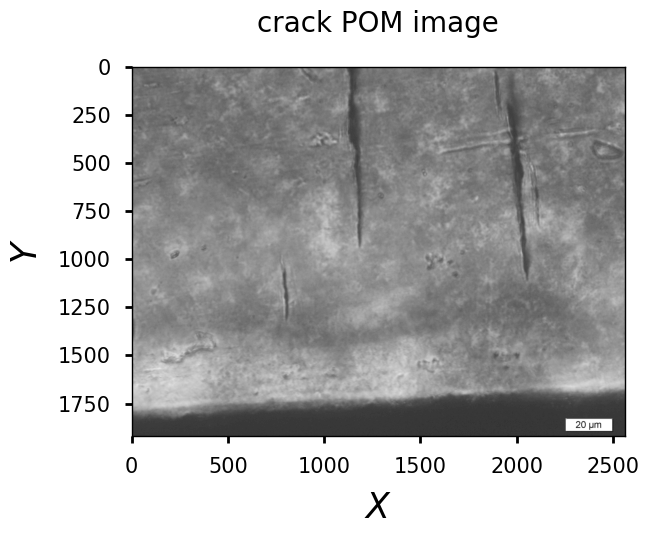

In [8]:
plt.rcParams["axes.labelsize"] = 25
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.titlepad"] = 25
plt.rcParams["axes.labelpad"] = 10
plt.rc("xtick.major", width=2, size=5, pad=10)
plt.rc("ytick.major", width=2, size=5, pad=10)
plt.rc("xtick", labelsize=15, direction="out")
plt.rc("ytick", labelsize=15, direction="out")

fig, ax = plt.subplots()

ax.imshow(grayscale_img, cmap="gray")
ax.set_title("crack POM image")
ax.set_xlabel("$X$")
ax.set_ylabel("$Y$")
ax.set_xlim(0, grayscale_img.shape[1])
ax.set_ylim(grayscale_img.shape[0], 0)